In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
import sys
import numpy as np

import json
from incense import ExperimentLoader
from pyrsistent import thaw

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
    
sns.set(color_codes=True);
sns.set_style("white", {'axes.grid' : False});

if '../src/' not in sys.path:
    sys.path.append('../src')
    
from analysis.hinton import plot_hinton_matrices, hinton

plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
# sns.axes_style("white", {'axes.grid' : False, 'axis.edgecolor': 1.0});

# Dsprites

In [105]:
results_path = '../data/results/disent/dsprites/'
plots_path = '../plots/disent/dsprites/'

In [106]:
extrp_scores = pd.read_csv(results_path + 'extrp/blank_side-metrics.csv')
recomb2range_scores = pd.read_csv(results_path + 'recomb2range/shape2tx-metrics.csv')
recomb2element_scores = pd.read_csv(results_path + 'recomb2element/leave1out-metrics.csv')

all_scores = pd.concat([recomb2element_scores, recomb2range_scores, extrp_scores],
                      keys=['Recombination to element', 'Recombination to Range', 'Extrapolation'], names=['Condition'])
del all_scores['Unnamed: 0']

In [107]:
all_scores.reset_index()

,Condition,level_1,Data,Models,NLL,Disentanglement
0,Recombination to element,0,Training,VAE,8.586071,0.286080
1,Recombination to element,1,Training,Beta-VAE(β=8),34.948973,0.765408
2,Recombination to element,2,Training,Beta-VAE(β=12),37.340993,0.556434
3,Recombination to element,3,Training,FactorVAE(γ=20),27.640093,0.483243
4,Recombination to element,4,Training,FactorVAE(γ=50),23.769840,0.390852
5,Recombination to element,5,Training,FactorVAE(γ=100),32.386295,0.502801
6,Recombination to element,6,Training,GT Decoder,49.803121,1.000000
7,Recombination to element,7,Test,VAE,8.055004,0.286080
8,Recombination to element,8,Test,Beta-VAE(β=8),24.623478,0.765408
9,Recombination to element,9,Test,Beta-VAE(β=12),24.915674,0.556434


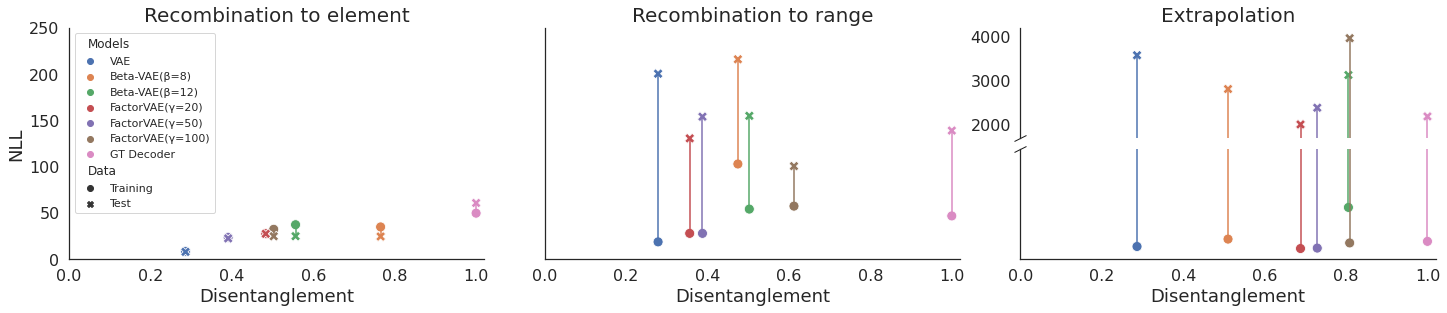

In [108]:
# fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharex=True, sharey=False)
marker_size = 100
nll_limit1 = (0, 250)
nll_limit2 = (1700, 4200)

fig = plt.figure(figsize=(20, 4))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(236)
ax4 = plt.subplot(233)

# Make axes on same horizontal share axis
ax1.get_shared_y_axes().join(ax1, ax2)
ax1.get_shared_y_axes().join(ax1, ax3)


axes = [ax1, ax2, ax3, ax4]

fig.tight_layout()
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

sns.scatterplot(data=recomb2element_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax1, s=marker_size, legend=True).set(xlim=(0, 1.02), ylim=nll_limit1)

for name, g in recomb2element_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax1.plot(x, y)

sns.scatterplot(data=recomb2range_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax2, s=marker_size, legend=False).set(xlim=(0, 1.02), ylim=nll_limit1)

for name, g in recomb2range_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax2.plot(x, y)

sns.scatterplot(data=extrp_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax3, s=marker_size, legend=False).set(xlim=(0, 1.02), ylim=nll_limit1)

for name, g in extrp_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax3.plot(x, y)

sns.scatterplot(data=extrp_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax4, s=marker_size, legend=False).set(xlim=(0, 1.02), ylim=nll_limit2)

for name, g in extrp_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax4.plot(x, y)

# Remove the spines
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
ax4.spines['bottom'].set_visible(False)
    
# Remove the labels and ticks
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_xlabel('')
ax4.set_ylabel('')

ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_xticks([])

# Add the diagonals
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax4.plot([0], [0], transform=ax4.transAxes, **kwargs)
ax3.plot([0], [1], transform=ax3.transAxes, **kwargs)

# Add the titles
ax1.set_title('Recombination to element', fontdict={'size': 20})
ax2.set_title('Recombination to range', fontdict={'size': 20})
ax4.set_title('Extrapolation', fontdict={'size': 20})


fig.savefig(plots_path + 'disent_vs_nll.pdf')
# fig.savefig('/home/milton/Dropbox/results/shapes3d/disent_vs_nll.pdf')

In [111]:
extrp_plots = np.load(results_path + '/extrp/blank_side-images.npz', allow_pickle=True)
recomb2range = np.load(results_path + '/recomb2range/shape2tx-images.npz', allow_pickle=True)
recomb2element = np.load(results_path + '/recomb2element/leave1out-images.npz', allow_pickle=True)

conditions = [recomb2element, recomb2range, extrp_plots]
condition_names = ['Recombination\n   to element', 'Recombination\n    to range', 'Extrapolation']

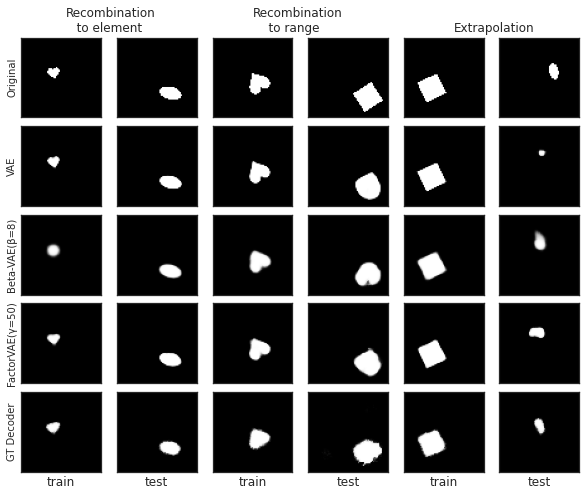

In [114]:
# Select examples
source_names = ['Original'] + list(extrp_plots['model_names'])
source_idx = [0, 1, 2, 5, 7]
examples = [[0, 3], [3, 3], [1, 1]]

# Init figure
fig, axes = plt.subplots(5, 6, figsize=(10, 8))
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

# Remove labels and ticks
for ax in axes.ravel():
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticks([])
    ax.set_xticks([])

# Plot images
for ci, cond in enumerate(conditions):
    
    train_recons = cond['train_recons']
    test_recons = cond['test_recons']
    
    train_example, test_example = examples[ci]

    for ax in axes.ravel():
        ax.set_ylabel('')
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_xticks([])

    for i, exi in enumerate(source_idx):
        axes[i, 2 * ci + 0].imshow(train_recons[exi, train_example].reshape(64, 64), cmap='Greys_r')
        axes[i, 2 * ci + 1].imshow(test_recons[exi, test_example].reshape(64, 64), cmap='Greys_r')
    

# Add source labels
for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(source_names[source_idx[i]], fontdict={'size': 10})

# Add data labels
for i in range(len(conditions)):
    axes[-1, 2*i].set_xlabel('train', fontdict={'size': 12})
    axes[-1, 2*i+1].set_xlabel('test', fontdict={'size': 12})
    
# Add condition labels
axes[0, 0].text(35, -5, condition_names[0])
axes[0, 2].text(32, -5, condition_names[1])
axes[0, 4].text(40, -5, condition_names[2]);

fig.savefig(plots_path + 'recons.pdf')

In [112]:
R_coeff = recomb2element['R_coeff']
model_names = recomb2element['model_names']

lat_names = list(map(lambda s: s.replace('_', ' '), ('shape', 'scale', 'orientation', 'posX', 'posY')))

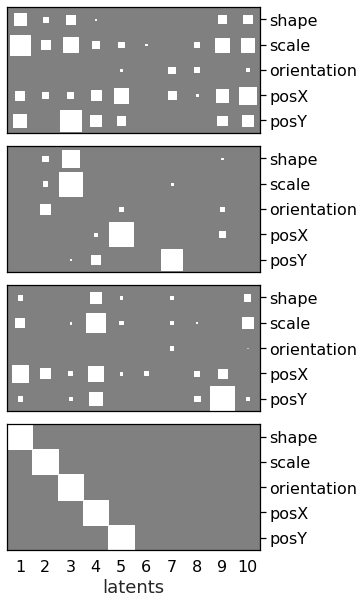

In [113]:
fig, axes = plt.subplots(4, figsize=(5, 10))
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

dummy_r_coeff = np.zeros((10, len(lat_names)))
dummy_r_coeff[:len(lat_names)] = np.diag(np.ones(len(lat_names)))

plotted_idx = [0, 1, 3]
plotted_coeffs = list(R_coeff[plotted_idx]) + [dummy_r_coeff]
plotted_names = list(model_names[plotted_idx]) + ['GT Decoder']

for axi, (r, n) in enumerate(zip(plotted_coeffs, plotted_names)):
    ax = axes[axi]
    
    hinton(r.T, ax=ax, fontsize=18, use_default_ticks=False)
    
    ax.yaxis.tick_right()
    ax.tick_params(direction='out', colors='black')
#     ax.set_yticks([], minor=True)
    
    ax.set_yticks(range(len(lat_names)))
#     ax.set_yticklabels(range(1, len(lat_names) + 1))
    ax.set_yticklabels(lat_names)
#     ax.set_ylabel('factors')
    
    ax.set_xticks([])
    
#     ax.set_title(n, fontdict={'size': 20})

ax.set_xticks(range(10));
ax.set_xticklabels(range(1, 11));
ax.set_xlabel('latents')

fig.savefig(plots_path + 'hinton.pdf')

# Shapes 3D

In [9]:
results_path = '../data/results/disent/shapes3d/'
plots_path = '../plots/disent/shapes3d/'

In [10]:
extrp_scores = pd.read_csv(results_path + 'extrp/floor_hue_50-metrics.csv')
recomb2range_scores = pd.read_csv(results_path + 'recomb2range/shape_to_objh-metrics.csv')
recomb2element_scores = pd.read_csv(results_path + 'recomb2element/leave1out-metrics.csv')

all_scores = pd.concat([recomb2element_scores, recomb2range_scores, extrp_scores],
                      keys=['Recombination to element', 'Recombination to Range', 'Extrapolation'], names=['Condition'])
del all_scores['Unnamed: 0']

In [11]:
all_scores.reset_index()

,Condition,level_1,Data,Models,NLL,Disentanglement
0,Recombination to element,0,Training,VAE,3481.059841,0.216529
1,Recombination to element,1,Training,Beta-VAE(β=8),3487.816949,0.724490
2,Recombination to element,2,Training,Beta-VAE(β=12),3500.664909,0.835175
3,Recombination to element,3,Training,FactorVAE(γ=20),3497.811908,0.901014
4,Recombination to element,4,Training,FactorVAE(γ=50),3503.009925,0.586025
5,Recombination to element,5,Training,FactorVAE(γ=100),3520.100191,0.534564
6,Recombination to element,6,Training,GT Decoder,3519.869262,1.000000
7,Recombination to element,7,Test,VAE,3923.286377,0.216529
8,Recombination to element,8,Test,Beta-VAE(β=8),3927.379395,0.724490
9,Recombination to element,9,Test,Beta-VAE(β=12),3940.539062,0.835175


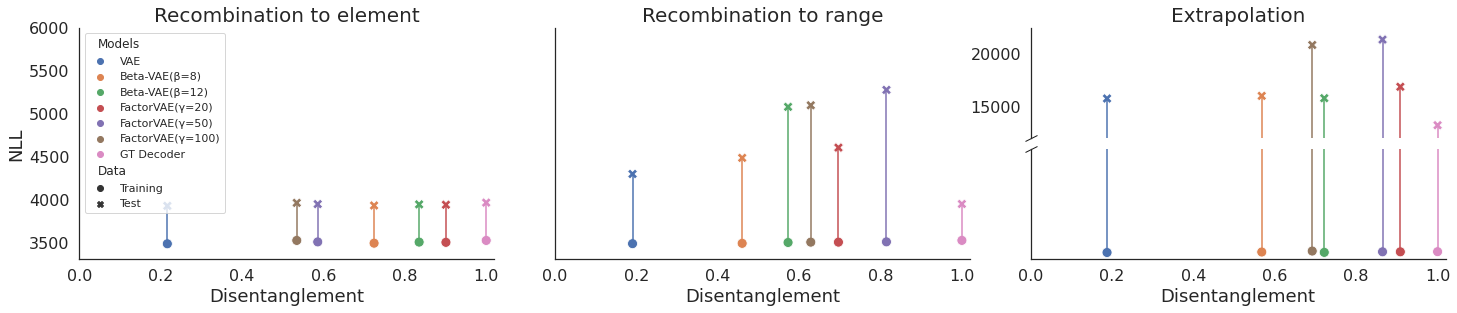

In [12]:
# fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharex=True, sharey=False)
marker_size = 100
nll_limit1 = (3300, 6000)
nll_limit2 = (12000, 22500)

fig = plt.figure(figsize=(20, 4))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(236)
ax4 = plt.subplot(233)

# Make axes on same horizontal share axis
ax1.get_shared_y_axes().join(ax1, ax2)
ax1.get_shared_y_axes().join(ax1, ax3)


axes = [ax1, ax2, ax3, ax4]

fig.tight_layout()
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

sns.scatterplot(data=recomb2element_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax1, s=marker_size, legend=True).set(xlim=(0, 1.02), ylim=nll_limit1)

for name, g in recomb2element_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax1.plot(x, y)

sns.scatterplot(data=recomb2range_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax2, s=marker_size, legend=False).set(xlim=(0, 1.02), ylim=nll_limit1)

for name, g in recomb2range_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax2.plot(x, y)

sns.scatterplot(data=extrp_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax3, s=marker_size, legend=False).set(xlim=(0, 1.02), ylim=nll_limit1)

for name, g in extrp_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax3.plot(x, y)

sns.scatterplot(data=extrp_scores, x='Disentanglement', y='NLL', hue='Models', style='Data',
                ax=ax4, s=marker_size, legend=False).set(xlim=(0, 1.02), ylim=nll_limit2)

for name, g in extrp_scores.groupby(['Models'], sort=False):
    y, x = g['NLL'].values, g['Disentanglement'].values
    ax4.plot(x, y)

# Remove the spines
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
ax4.spines['bottom'].set_visible(False)
    
# Remove the labels and ticks
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_xlabel('')
ax4.set_ylabel('')

ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_xticks([])

# Add the diagonals
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax4.plot([0], [0], transform=ax4.transAxes, **kwargs)
ax3.plot([0], [1], transform=ax3.transAxes, **kwargs)

# Add the titles
ax1.set_title('Recombination to element', fontdict={'size': 20})
ax2.set_title('Recombination to range', fontdict={'size': 20})
ax4.set_title('Extrapolation', fontdict={'size': 20})


fig.savefig(plots_path + 'disent_vs_nll.pdf')
# fig.savefig('/home/milton/Dropbox/results/shapes3d/disent_vs_nll.pdf')

In [13]:
extrp_plots = np.load(results_path + '/extrp/floor_hue_50-images.npz', allow_pickle=True)
recomb2range = np.load(results_path + '/recomb2range/shape_to_objh-images.npz', allow_pickle=True)
recomb2element = np.load(results_path + '/recomb2element/leave1out-images.npz', allow_pickle=True)

conditions = [recomb2element, recomb2range, extrp_plots]
condition_names = ['Recombination\n   to element', 'Recombination\n    to range', 'Extrapolation']

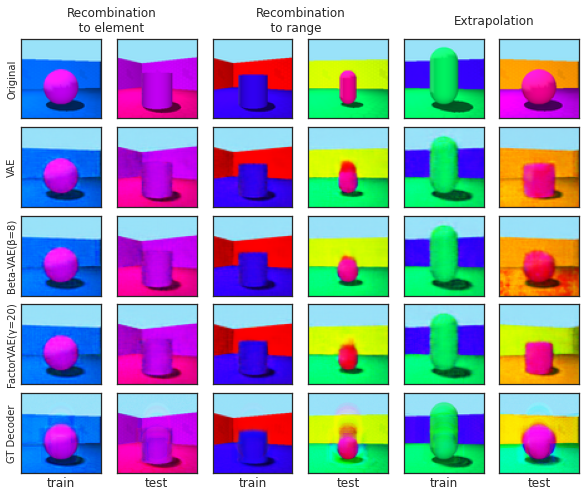

In [18]:
# Select examples
source_names = ['Original'] + list(extrp_plots['model_names'])
source_idx = [0, 1, 2, 4, 7]
examples = [[0, 2], [2, 0], [1, 1]]

# Init figure
fig, axes = plt.subplots(5, 6, figsize=(10, 8))
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

# Remove labels and ticks
for ax in axes.ravel():
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticks([])
    ax.set_xticks([])

# Plot images
for ci, cond in enumerate(conditions):
    
    train_recons = cond['train_recons']
    test_recons = cond['test_recons']
    
    train_example, test_example = examples[ci]

    for ax in axes.ravel():
        ax.set_ylabel('')
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_xticks([])

    for i, exi in enumerate(source_idx):
        axes[i, 2 * ci + 0].imshow(train_recons[exi, train_example].reshape(3, 64, 64).transpose(1, 2, 0))
        axes[i, 2 * ci + 1].imshow(test_recons[exi, test_example].reshape(3, 64, 64).transpose(1, 2, 0))
    

# Add source labels
for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(source_names[source_idx[i]], fontdict={'size': 10})

# Add data labels
for i in range(len(conditions)):
    axes[-1, 2*i].set_xlabel('train', fontdict={'size': 12})
    axes[-1, 2*i+1].set_xlabel('test', fontdict={'size': 12})
    
# Add condition labels
axes[0, 0].text(36, -6, condition_names[0])
axes[0, 2].text(34, -6, condition_names[1])
axes[0, 4].text(40, -12, condition_names[2]);

fig.savefig(plots_path + 'recons.pdf')

In [44]:
R_coeff = recomb2element['R_coeff']
model_names = recomb2element['model_names']

lat_names = list(map(lambda s: s.replace('_', ' '), ('floor_hue', 'wall_hue', 'object_hue', 'scale', 'shape', 'orientation')))

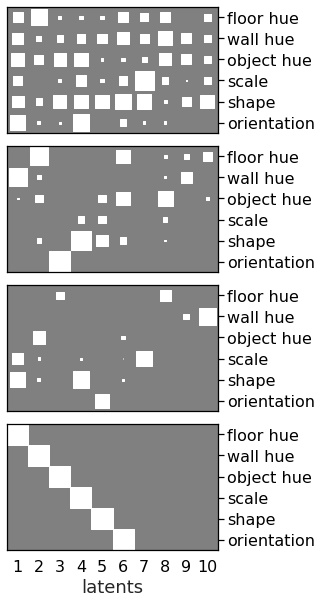

In [104]:
fig, axes = plt.subplots(4, figsize=(5, 10))
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

dummy_r_coeff = np.zeros((10, len(lat_names)))
dummy_r_coeff[:len(lat_names)] = np.diag(np.ones(len(lat_names)))

plotted_idx = [0, 1, 3]
plotted_coeffs = list(R_coeff[plotted_idx]) + [dummy_r_coeff]
plotted_names = list(model_names[plotted_idx]) + ['GT Decoder']

for axi, (r, n) in enumerate(zip(plotted_coeffs, plotted_names)):
    ax = axes[axi]
    
    hinton(r.T, ax=ax, fontsize=18, use_default_ticks=False)
    
    ax.yaxis.tick_right()
    ax.tick_params(direction='out', colors='black')
#     ax.set_yticks([], minor=True)
    
    ax.set_yticks(range(len(lat_names)))
#     ax.set_yticklabels(range(1, len(lat_names) + 1))
    ax.set_yticklabels(lat_names)
#     ax.set_ylabel('factors')
    
    ax.set_xticks([])
    
#     ax.set_title(n, fontdict={'size': 20})

ax.set_xticks(range(10));
ax.set_xticklabels(range(1, 11));
ax.set_xlabel('latents')

fig.savefig(plots_path + 'hinton.pdf')